# Assignment 8 - Linear Regression

## Problem statement 5
A certain university wants to understand the relationship between students’ SAT scores and their GPA. Build a Simple Linear Regression model with GPA as the target variable and record the RMSE and correlation coefficient values for different models.

## 1. Business Problem

1.1 What is the business objective?
- Build a Simple Linear Regression model to predict GPA using SAT scores.

- Apply and compare different transformations (logarithmic, exponential, polynomial).

- Evaluate model performance using RMSE, R-squared, and correlation coefficient.

- Help the university understand how SAT scores influence student academic performance.

1.2 Are there any constraints?
- The model is built using only SAT scores, which may not fully explain GPA variance.

- Assumes a linear or transformable relationship.

- External factors influencing GPA (like coursework, major, or study habits) are not included.

- Data may contain outliers or inaccuracies.



## 2. Data dictionary
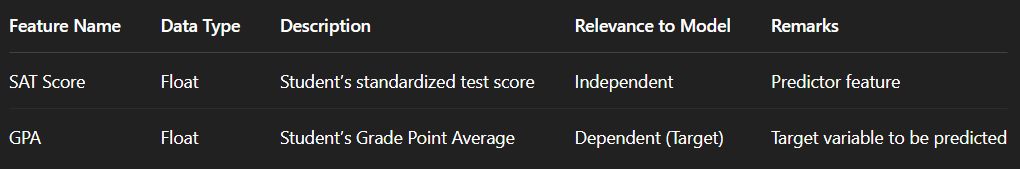

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [3]:
# Load the data
data = pd.read_csv("SAT_GPA.csv")
print(data.head())

   SAT_Scores  GPA
0         206  2.3
1         214  2.4
2         717  3.5
3         580  2.8
4         404  2.6


In [4]:
data.shape

(200, 2)

## 3.Data Preprocessing

In [5]:
data.dtypes

SAT_Scores      int64
GPA           float64
dtype: object

In [6]:
data.isna().sum()

SAT_Scores    0
GPA           0
dtype: int64

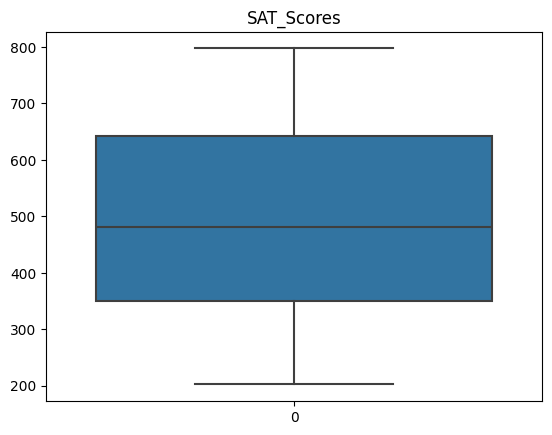

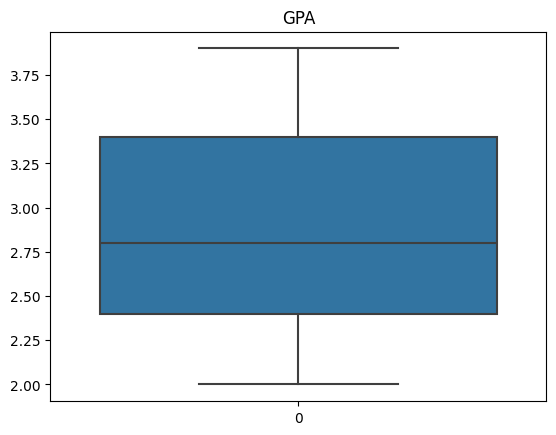

In [7]:
# Check for outliers
for i in data.columns:
    sns.boxplot(data[i])
    plt.title(i)
    plt.show()

## 4.EDA

In [8]:
#Descriptive statistics
data.describe()

,SAT_Scores,GPA
count,200.000000,200.000000
mean,491.810000,2.849500
std,174.893834,0.541076
min,202.000000,2.000000
25%,349.750000,2.400000
50%,480.500000,2.800000
75%,641.500000,3.400000
max,797.000000,3.900000


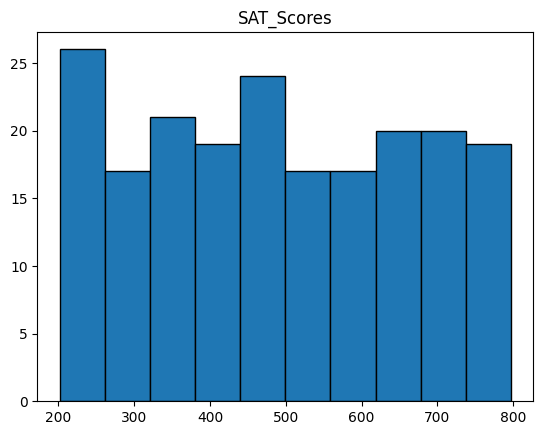

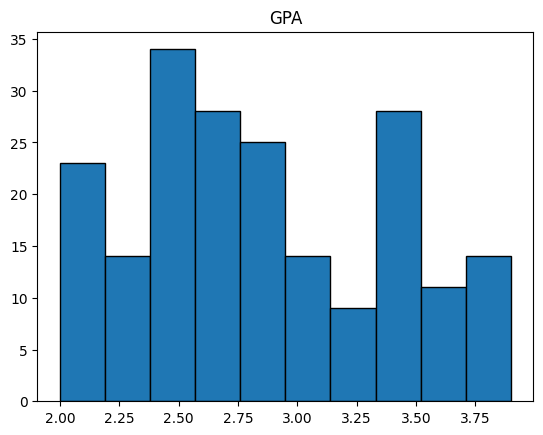

In [22]:
#univariate analysis
for i in data.columns:
    plt.hist(data[i],bins=10, edgecolor='black')
    plt.title(i)
    plt.show()

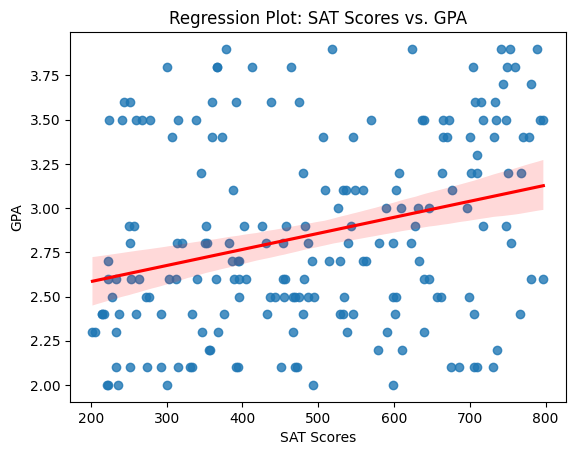

In [10]:
# Bivariate Analysis
# Scatter plot with regression line
sns.regplot(x=data['SAT_Scores'], y=data['GPA'], line_kws={"color": "red"})
plt.xlabel("SAT Scores")
plt.ylabel("GPA")
plt.title("Regression Plot: SAT Scores vs. GPA")
plt.show()

In [23]:
#correlation matrix
data.corr()

,SAT_Scores,GPA
SAT_Scores,1.000000,0.293538
GPA,0.293538,1.000000


## 4. Model Building

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures

In [13]:
X = data[['SAT_Scores']]
y = data['GPA']

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the model
model = LinearRegression()

In [16]:
# Fit the model
model.fit(X_train, y_train)

LinearRegression()

In [17]:
# Make predictions
y_pred = model.predict(X_test)

In [18]:

# Evaluate the model
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
print(f'Simple Linear Regression - RMSE: {rmse}, R-Squared: {r2}')


Simple Linear Regression - RMSE: 0.547475367289355, R-Squared: 0.0057906035703984005


In [19]:

# Apply different transformations and calculate RMSE and correlation coefficient for each model

# Log Transformation
X_log = np.log(X)
X_train_log, X_test_log, y_train_log, y_test_log = train_test_split(X_log, y, test_size=0.2, random_state=42)
model_log = LinearRegression()
model_log.fit(X_train_log, y_train_log)
y_pred_log = model_log.predict(X_test_log)

rmse_log = np.sqrt(mean_squared_error(y_test_log, y_pred_log))
r2_log = r2_score(y_test_log, y_pred_log)
print(f'Log Transformation - RMSE: {rmse_log}, R-Squared: {r2_log}')


Log Transformation - RMSE: 0.5440367189724863, R-Squared: 0.018240479010371957


In [20]:
# Polynomial Transformation
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)
X_train_poly, X_test_poly, y_train_poly, y_test_poly = train_test_split(X_poly, y, test_size=0.2, random_state=42)

model_poly = LinearRegression()
model_poly.fit(X_train_poly, y_train_poly)
y_pred_poly = model_poly.predict(X_test_poly)

rmse_poly = np.sqrt(mean_squared_error(y_test_poly, y_pred_poly))
r2_poly = r2_score(y_test_poly, y_pred_poly)
print(f'Polynomial Transformation - RMSE: {rmse_poly}, R-Squared: {r2_poly}')


Polynomial Transformation - RMSE: 0.5520338468768945, R-Squared: -0.010834623427158352


In [21]:
# Choose the best fit model
best_model = min([(rmse, r2, 'Simple Linear Regression'), (rmse_log, r2_log, 'Log Transformation'), (rmse_poly, r2_poly, 'Polynomial Transformation')])

print(f'Best Model: {best_model[2]} with RMSE: {best_model[0]} and R-Squared: {best_model[1]}')

Best Model: Log Transformation with RMSE: 0.5440367189724863 and R-Squared: 0.018240479010371957
